**Содержание темы**

1. Теория

2. [Практический ноутбук 1](https://colab.research.google.com/drive/1JhNKmphhIAZ9MCqm9_-vsnJkiLxTTv5d?usp=sharing)

3. [Практический ноутбук 2](https://colab.research.google.com/drive/1xnH8OUXgWk9D2zAZsLMAjxsQx8ejmrsz?usp=sharing)


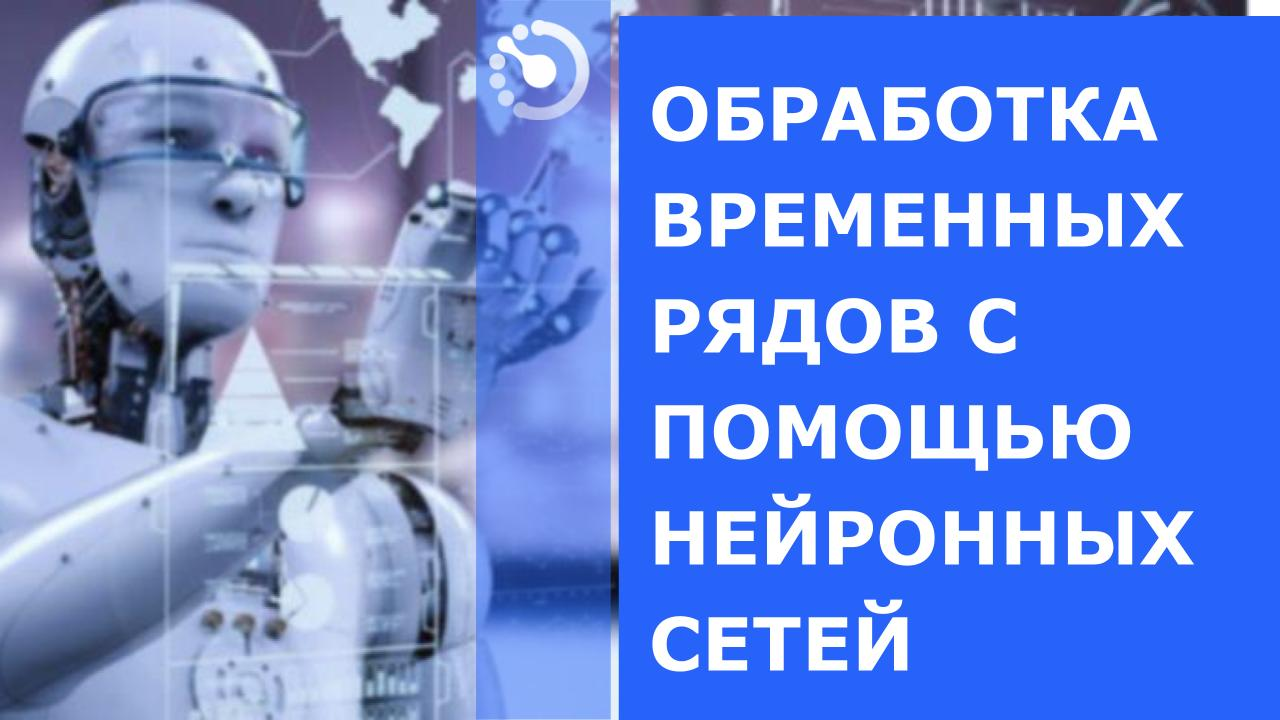

Цель занятия: научиться обрабатывать новый тип данных – временные ряды. Рассмотреть особенности, сложности, которые возникают при работе и способы их устранения. Также разобрать архитектуры, которые можно использовать.

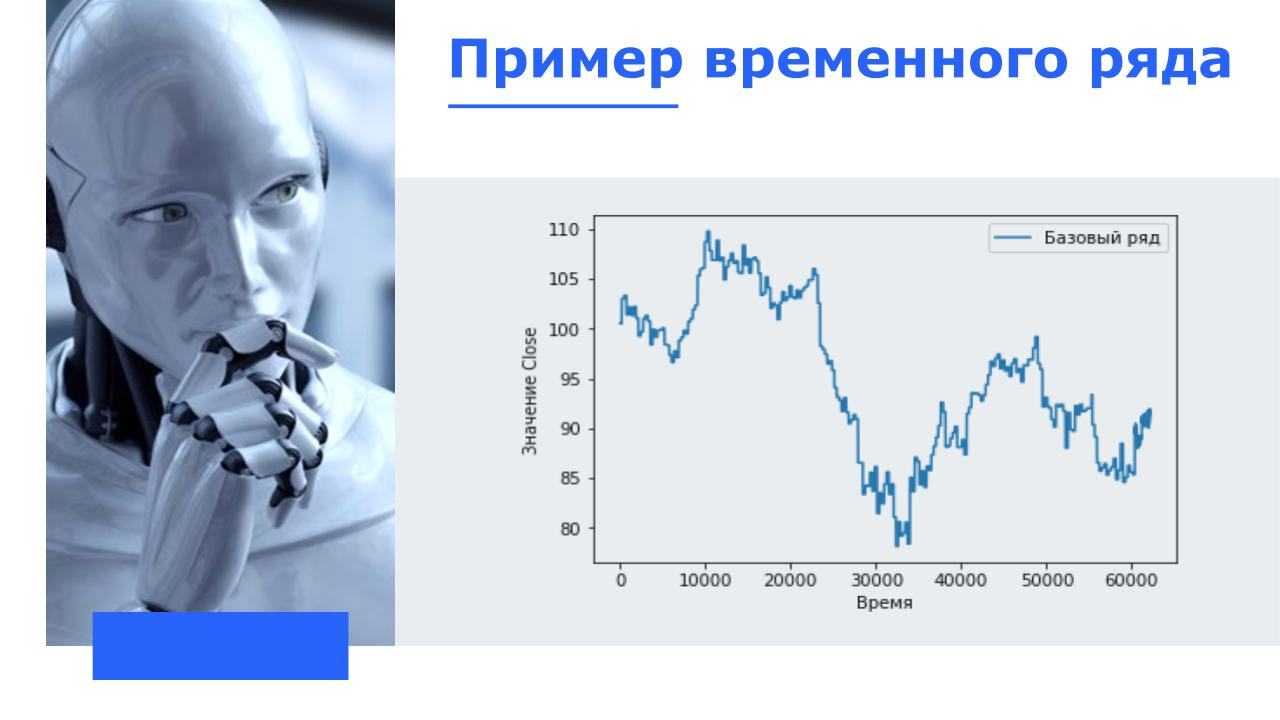

Временной ряд – это последовательность значений. На слайде представлен график стоимости акции за период времени – это один из самых простых примеров. Также к временным рядам относятся графики производственных процессов, изменения температуры в течение месяца или даже видео, аудио.

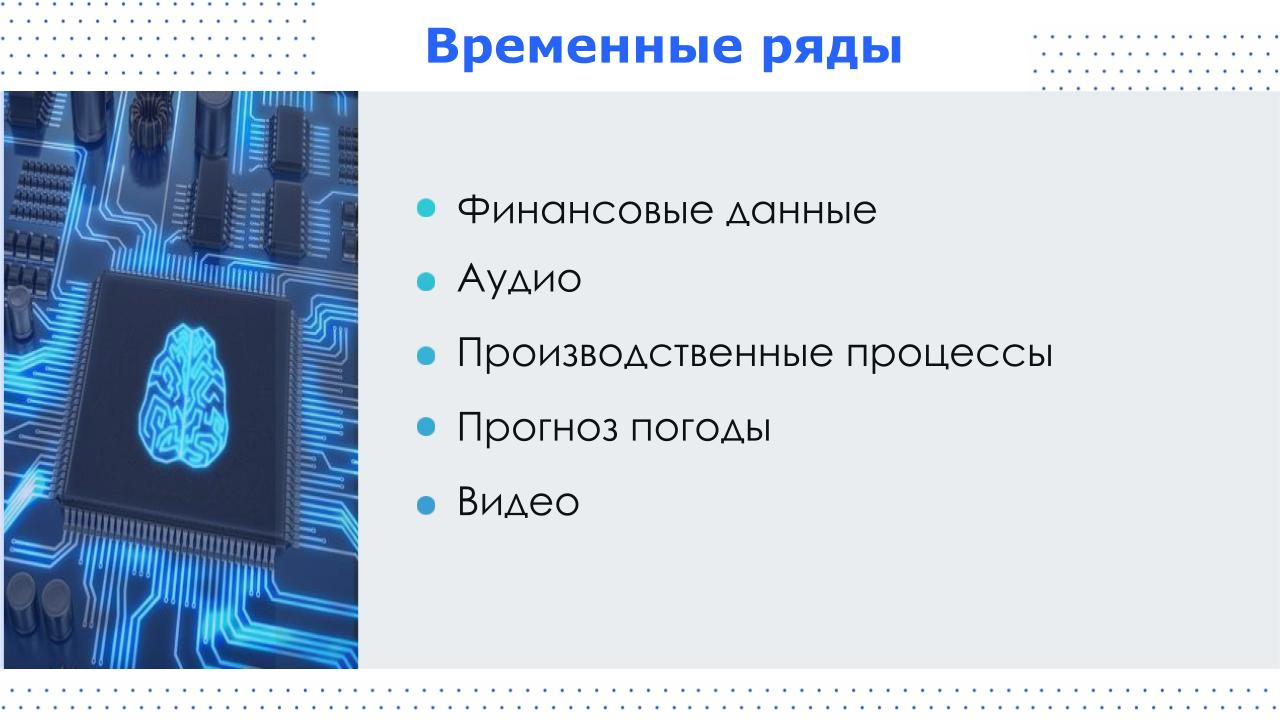

В обработке аудиоинформации как временного ряда есть свои особенности, которым посвящен отдельный урок. 

Остановимся подробнее на видео. Так как временной ряд – последовательность значений, то любое видео можно разложить как последовательность значений-кадров. А любой кадр можно разложить на цифровое обозначение в трех каналах.

Новички часто путают задачу регрессии и обработки временных рядов. Главное различие между данными в этих задачах в том, что во временных рядах данные зависят друг от друга. Вспомним недавнюю задачу про оценку стоимости квартиры. Там обрабатывались следующие данные:
- этаж;
- площадь;
- санузел;
- наличие балкона;
- метро;
- и прочие.
Но эти данные между собой никак не связаны. Их можно менять между собой в последовательности, и результат от этого не изменится.

При работе с временными рядами последовательность очень важна, а потому данные нельзя перемешивать как вздумается. Например, мы знаем погоду за первые 10 дней января и надо предсказать ее за 11 число. Представим, что за эти 10 дней температура с $-30^0С$ повысилась до $-20^0С$ с ежедневной дельтой в один градус. 

Без НС можно предсказать, что 11 числа скорее всего будет $-19^0С$.

А теперь попробуем предсказать погоду, если по дням она выглядит так: $-20^0С$, $-25^0С$, $-21^0С$, $-22^0С$, $-23^0С$, $-24^0С$, $-26^0С$, $-27^0С$, $-28^0С$, $-29^0С$, $-30^0С$. Получается, что температура должна упасть до $-31^0С$. Данные те же, но нарушена их последовательность, что делает результат совсем другим.


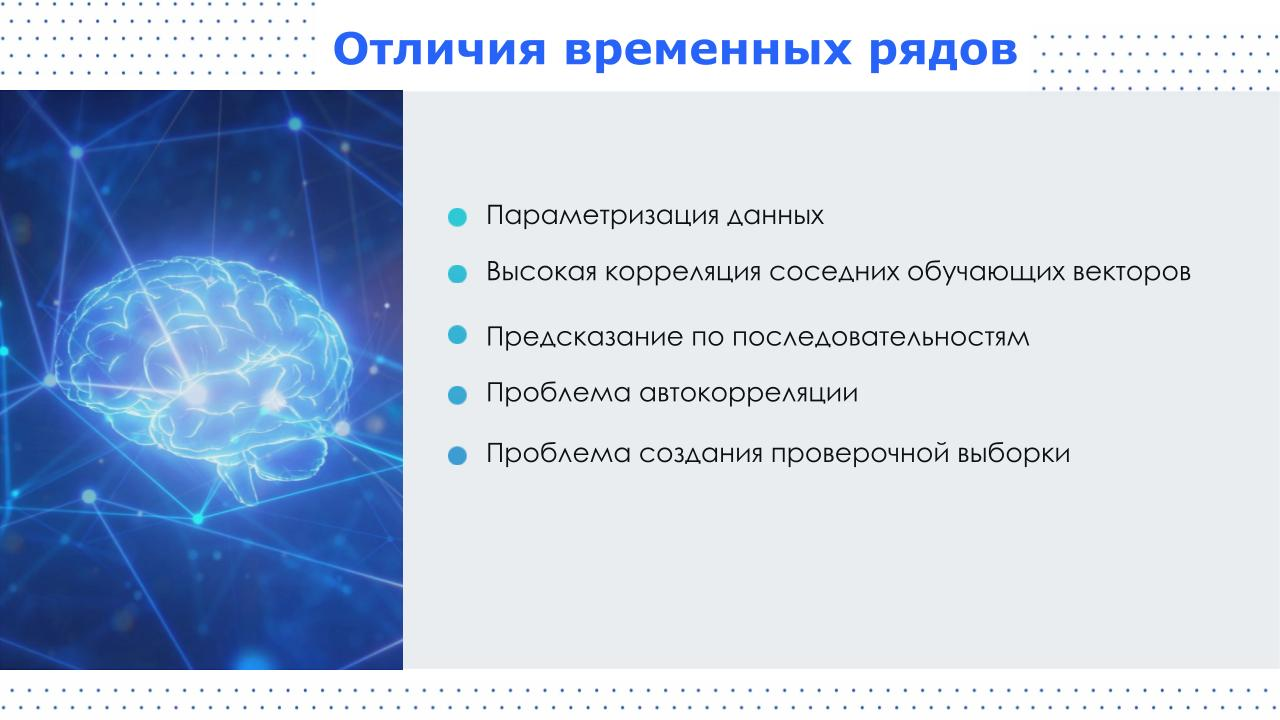

Из этого вытекает первая особенность временных рядов – специфическая параметризация данных и предсказание по последовательностям.

Высокую корреляцию соседних обучающих векторов мы рассмотрим чуть позже при подготовке выборки.

Также существуют проблемы автокорреляции и создания проверочной выборки, которые мы также рассмотрим чуть позже.


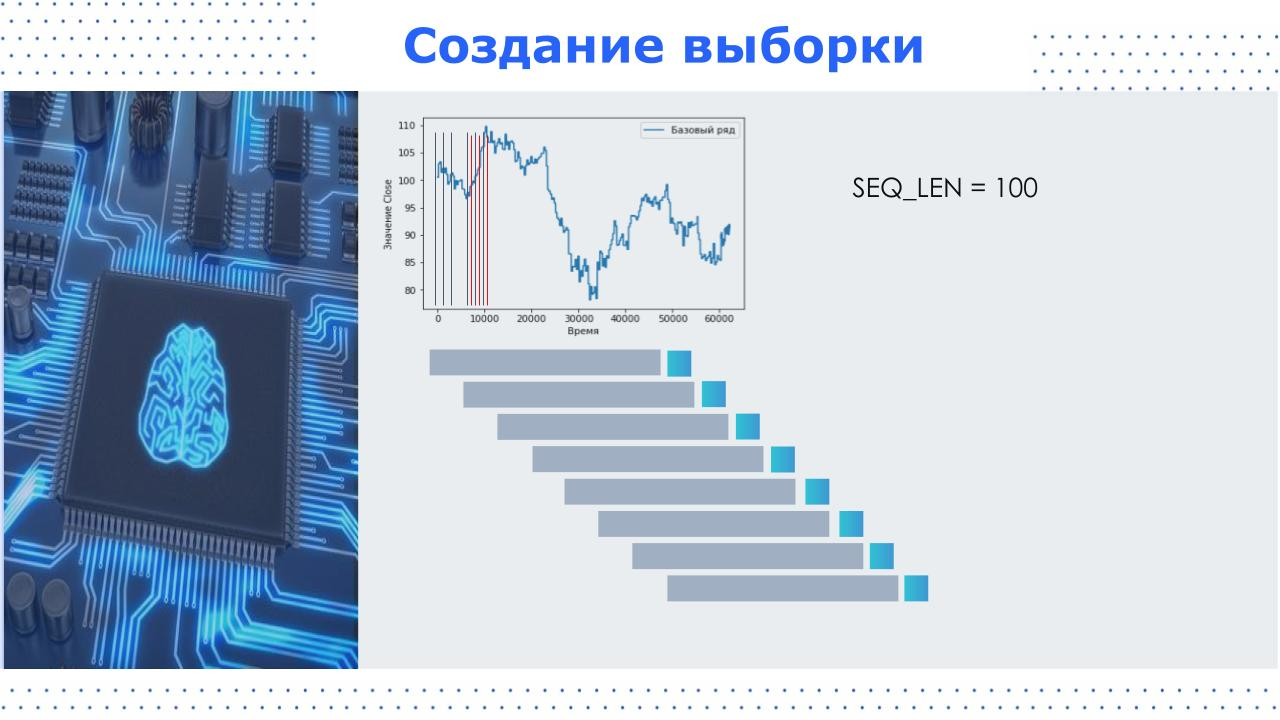

Начнем с выборки. Чтобы было, что обрабатывать, необходимо получить выборку по временному ряду. Временной ряд на слайде ниже нам уже знаком. По данному графику сделаем предсказание по новой цене закрытия торгов. Например, имея данные за 20 дней, предскажем стоимость на 21 день.

Такая логика действует и при подготовке выборок. Берете первые 20 отчетов (серый блок на слайде) и помещаете их в x_train, а цену в 21-ом отчете (голубой блок) – в y_train. Главный вопрос: что будет вторым элементом в x_train? Есть два варианта:
- берем отчеты с 22 по 42 в **x_train** и 43 отчет в **y_train**;
- берем отчеты с 2 по 22 в **x_train** и 23 отчет в **y_train**.

Если мы используем второй метод, это вызовет проблему большой корреляции соседних элементов между собой. Все потому, что второй элемент обучающей выборки на более чем на 90% состоит из первого элемента.

Если брать шаг в 100 отчетов, то связь от первого элемента теряется только к 101 элементу. Это не проблема для НС, к тому же, мы можем создать большую обучающую выборку.


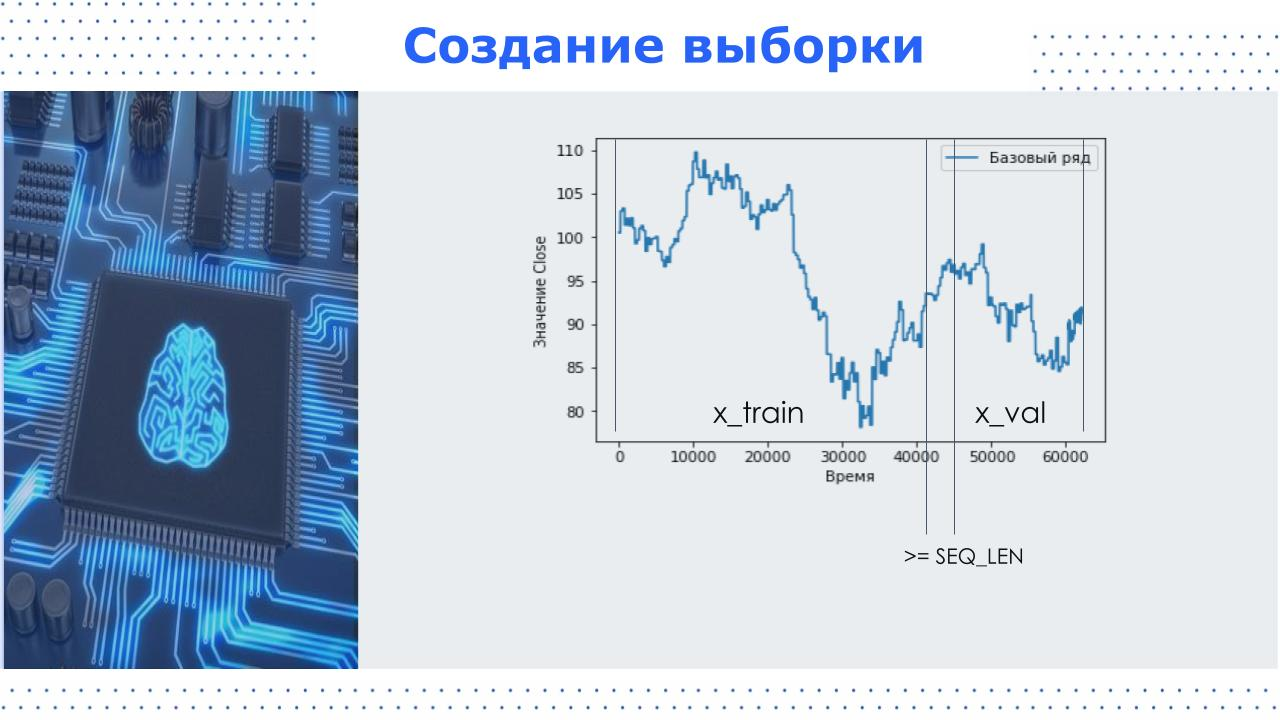

Одна из особенностей обработки временных рядов – формирование проверочной выборки. Для этого между выборками оставляют временной промежуток. Он должен быть больше или равен длине элемента выборки. Это исключает корреляцию между элементами обучающей и проверочной выборок.

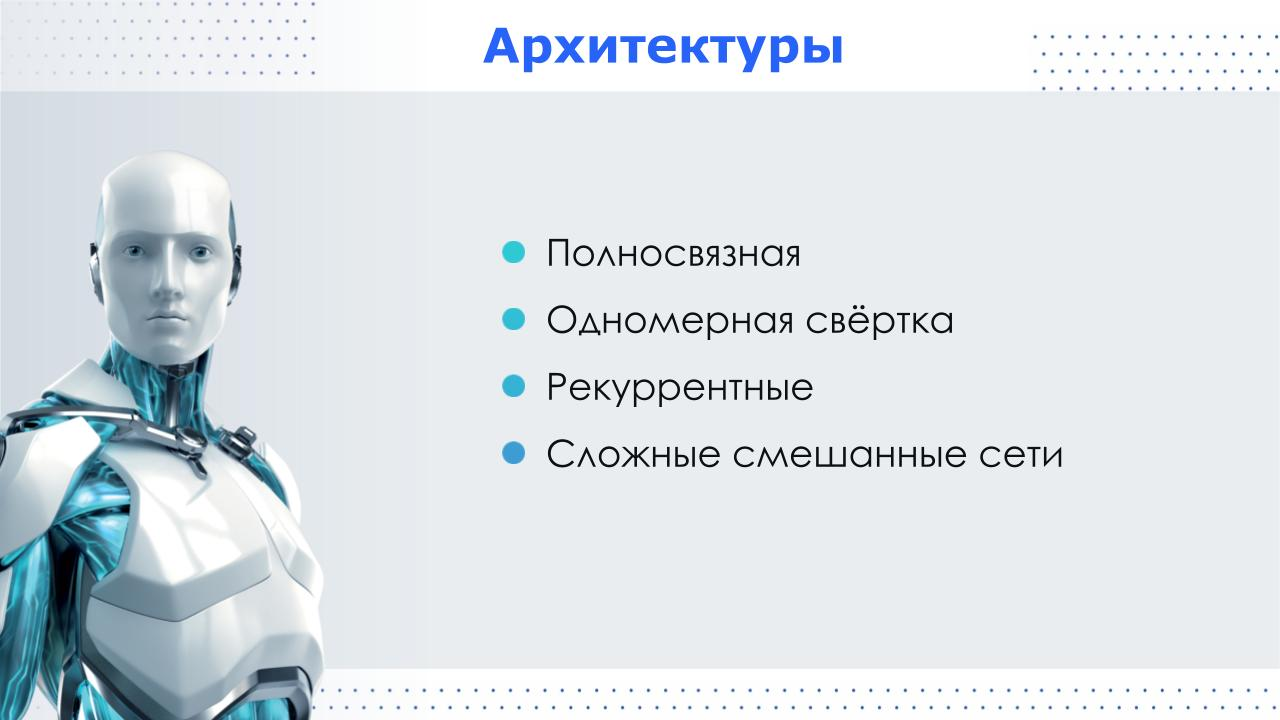

В работе с временными рядами используют различные архитектуры: как обычные полносвязные, так и одномерные свертки, рекуррентные сети, которые хорошо работают с последовательностями. Еще при помощи Functional API создают сложные разветвленные сети.

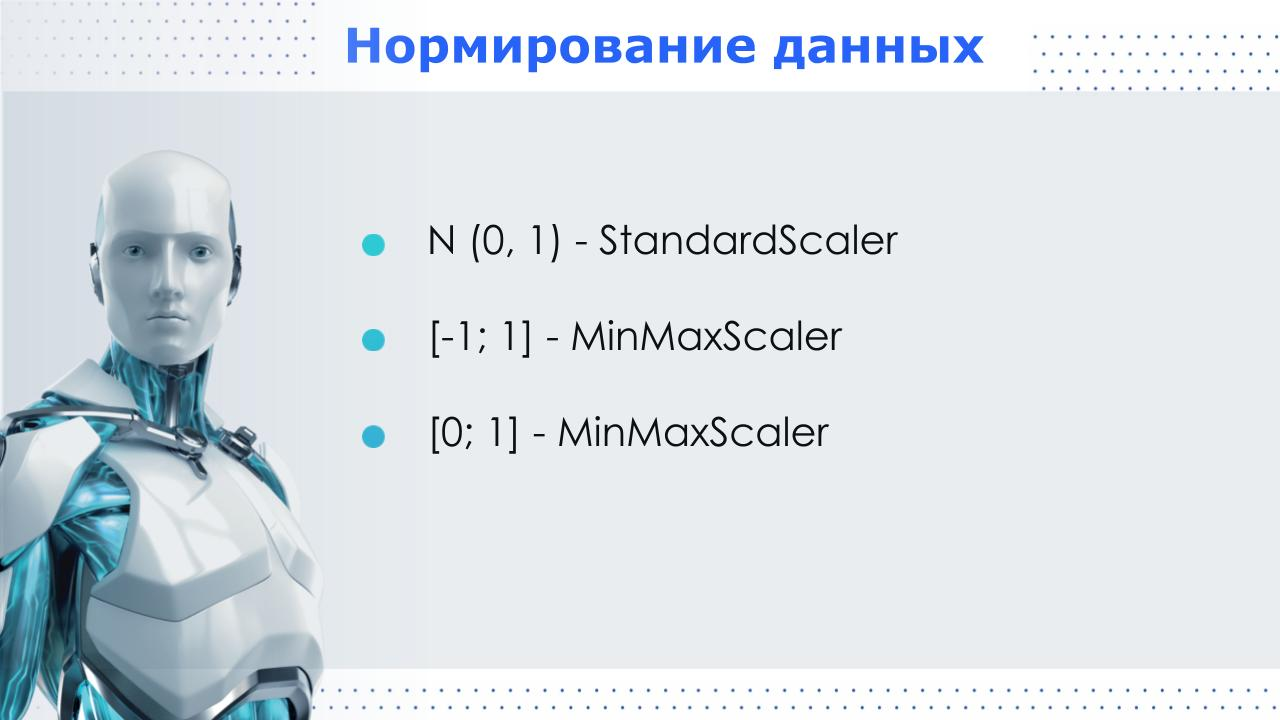

При работе с временными рядами необходимо нормирование данных. 

Для примера рассмотрим уже знакомый временной ряд. Обычно для работы по стоимости акций есть пять наборов данных (закрытие, открытие, максимум, минимум и объем торговли). Если первые четыре могут иметь один и тот же порядок, то у объема торговли он может быть другим, что ухудшит работу НС. Нормирование как раз и используют для приведения данных к общему виду и порядку.

**StandardScaler** приводит данные с параметрами ***среднее*** равное 0 и ***среднеквадратичным отклонением*** равное 1. **MinMaxScaler** может иметь два диапазона: $[-1;1]$ и $[0;1]$. Данные нормируют как все сразу, так и столбцы по отдельности. 

Для каждого нормирования важно подобрать правильную активационную функцию на выходном слое. Для стандартного скейлера используют **linear**, так как он выдает результат в диапазоне $(-∞;+∞)$. Для **MinMaxScaler** с диапазоном $[-1;1]$, помимо **linear**, используют **tanh**. Для **MinMaxScaler** с диапазоном $[0;1]$ используют **sigmoid** и **relu**.


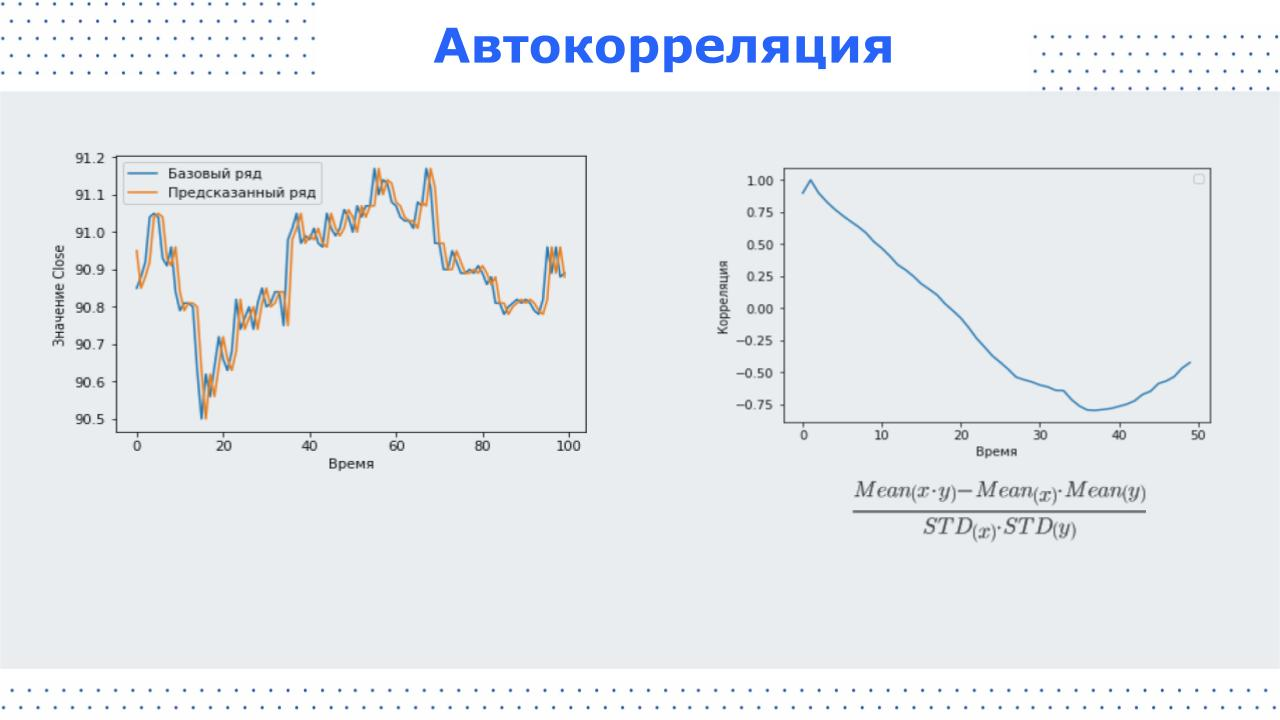

Посмотрим на график временного ряда: синим подсвечен базовый ряд, а оранжевым – предсказания НС. Вроде бы все хорошо, НС точно предсказывает данные, но если присмотреться, то график предсказания на один шаг опаздывает от основного временного ряда. Это и есть пример автокорреляции. В этом случае НС схитрила. Вместо предсказания действительного значения она берет последнее значение из элемента выборки:

        | 7 | 5 | 4 | 3 | 2 | – предсказано 2;
        | 5 | 4 | 3 | 2 | 1 | – предсказано 1;
        | 4 | 3 | 2 | 1 | 0 | – предсказано 0.

Это и дает графику смещение на 1 шаг.

Чтобы проверить, есть ли автокорреляция, нужно построить оба графика, либо построить отдельный график автокорреляции. Формулу графика рассмотрим в практической части, сейчас нужно понять только ее логику. 

Она достаточно проста: берем временной ряд и график предсказаний, считаем по формуле и, например, получаем 0,8 (начало графика автокорреляции). Дальше смещаем базовый ряд на шаг вправо, снова считаем по формуле и получаем 1 (пик на графике). И так далее:
- 1 – графики идентичны;
- 0 – графики не коррелируются;
- -1 – графики противоположны (y=x и y=-x).

В идеальном варианте график автокорреляции должен быть постоянно убывающим без холмика, как на примере, и стартовать максимально близко к 1.

На практике мы построим график автокорреляции не только к предсказанию, но и к самому графику. Это необходимо, чтобы: 
- увидеть идеальный график автокорреляции для предсказаний НС;
- увидеть сезонность. Ниже представлен график автокорреляции для временного ряда, в котором есть сезонность. Временные ряды с сезонностью – объемы продаж зонтиков и елок.


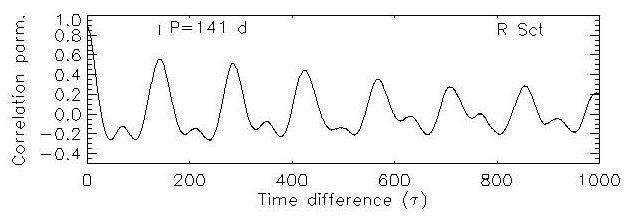

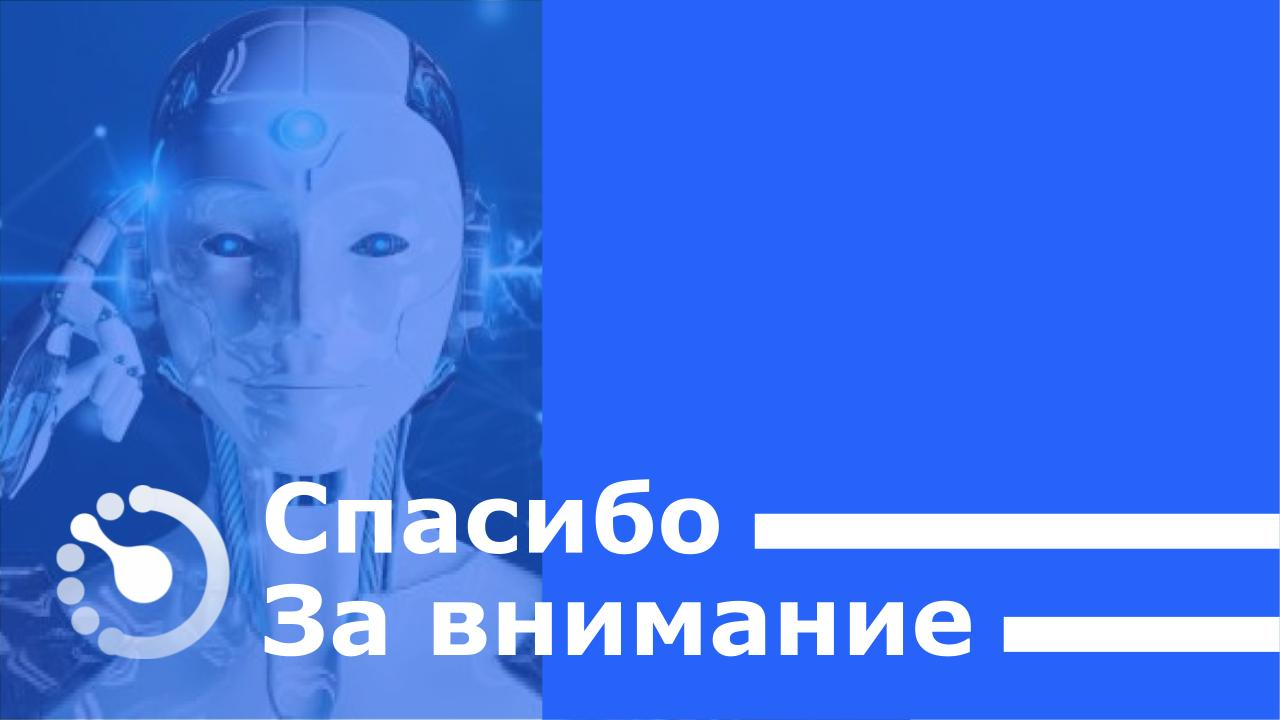

**Содержание темы**

1. Теория

2. [Практический ноутбук 1](https://colab.research.google.com/drive/1JhNKmphhIAZ9MCqm9_-vsnJkiLxTTv5d?usp=sharing)

3. [Практический ноутбук 2](https://colab.research.google.com/drive/1xnH8OUXgWk9D2zAZsLMAjxsQx8ejmrsz?usp=sharing)
